In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report, 
    roc_auc_score, 
    roc_curve, 
    average_precision_score, 
    log_loss, 
    matthews_corrcoef
)
from sklearn.preprocessing import LabelEncoder
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(columns=["Ticket","Cabin","Name","PassengerId"],axis=1,inplace=True)

In [5]:
df.shape

(891, 8)

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

<ipython-input-7-993656b341a6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace=True)


In [8]:
le=LabelEncoder()
col=["Sex","Embarked"]
for x in col:
    df[x]=le.fit_transform(df[x])

In [9]:
df=df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]]

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
col=["Age","Fare"]
df[col]=scaler.fit_transform(df[col])

In [12]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,0.271174,1,0,0.014151,2,0
1,1,0,0.472229,1,0,0.139136,0,1
2,3,0,0.321438,0,0,0.015469,2,1
3,1,0,0.434531,1,0,0.103644,2,1
4,3,1,0.434531,0,0,0.015713,2,0


In [13]:
df.drop(columns=["Age","Sex"],axis=1,inplace=True)

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.drop("Survived", axis=1)
y = df["Survived"]
chi2_selector = SelectKBest(chi2, k="all")
chi2_selector.fit(X, y)

chi2_results=pd.DataFrame({"Feature":X.columns,"P-value":chi2_selector.pvalues_})
chi2_results

,Feature,P-value
0,Pclass,2.753786e-08
1,SibSp,1.080942e-01
2,Parch,1.484707e-03
3,Fare,2.980820e-03
4,Embarked,1.787913e-03


In [15]:
df.head()

,Pclass,SibSp,Parch,Fare,Embarked,Survived
0,3,1,0,0.014151,2,0
1,1,1,0,0.139136,0,1
2,3,0,0,0.015469,2,1
3,1,1,0,0.103644,2,1
4,3,0,0,0.015713,2,0


In [16]:
from sklearn.model_selection import train_test_split
X = df.drop("Survived", axis=1)  
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (712, 5)
Testing features shape: (179, 5)
Training target shape: (712,)
Testing target shape: (179,)


# xgb_classifier

In [17]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [18]:
xgb_predictions = xgb_classifier.predict(X_test)
print("XGBClassifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, xgb_predictions)}")
print(f"Precision: {precision_score(y_test, xgb_predictions)}")
print(f"Recall: {recall_score(y_test, xgb_predictions)}")
print(f"F1 Score: {f1_score(y_test, xgb_predictions)}")

XGBClassifier Metrics:
Accuracy: 0.7150837988826816
Precision: 0.7017543859649122
Recall: 0.5405405405405406
F1 Score: 0.6106870229007634


In [19]:
print("Classification Report:")
label_name=["No","Yes"]
print(classification_report(y_test, xgb_predictions,target_names=label_name))

Classification Report:
              precision    recall  f1-score   support

          No       0.72      0.84      0.78       105
         Yes       0.70      0.54      0.61        74

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.71      0.72      0.71       179



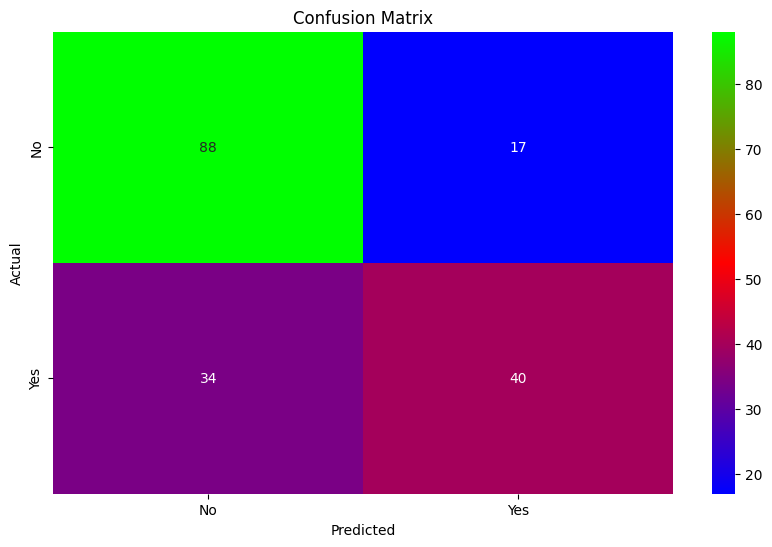

In [20]:
cm=confusion_matrix(y_test,xgb_predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="brg", xticklabels=label_name, yticklabels=label_name)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# randomforest classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [22]:
print("XGBClassifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test,y_pred)}")
print(f"Recall: {recall_score(y_test,y_pred)}")
print(f"F1 Score: {f1_score(y_test,y_pred)}")

XGBClassifier Metrics:
Accuracy: 0.7094972067039106
Precision: 0.6666666666666666
Recall: 0.5945945945945946
F1 Score: 0.6285714285714286


In [23]:
print(classification_report(y_test, y_pred,target_names=label_name))

              precision    recall  f1-score   support

          No       0.73      0.79      0.76       105
         Yes       0.67      0.59      0.63        74

    accuracy                           0.71       179
   macro avg       0.70      0.69      0.70       179
weighted avg       0.71      0.71      0.71       179



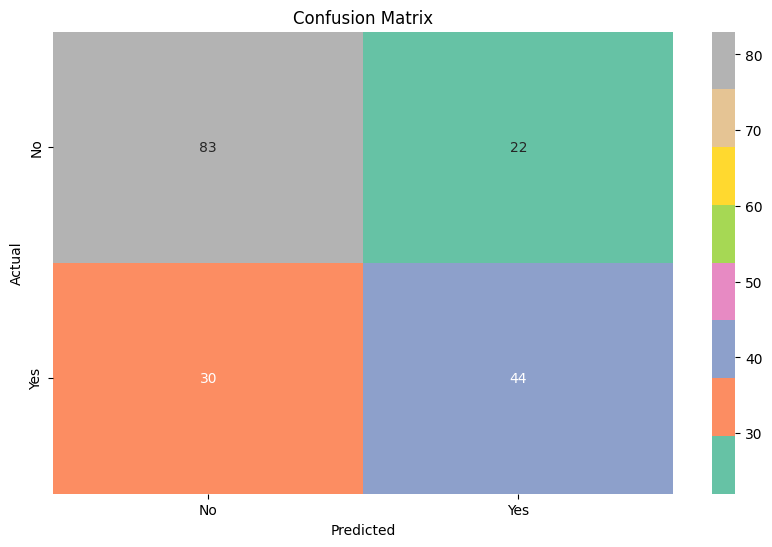

In [24]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Set2", xticklabels=label_name, yticklabels=label_name)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# catboost classifier

In [25]:
catboost_classifier = CatBoostClassifier(learning_rate=0.001, depth=10, iterations=200, verbose=1)
catboost_classifier.fit(X_train, y_train)
catboost_predictions = catboost_classifier.predict(X_test)

0:	learn: 0.6929048	total: 48.8ms	remaining: 9.72s
1:	learn: 0.6926457	total: 50.8ms	remaining: 5.03s
2:	learn: 0.6922938	total: 60.9ms	remaining: 4s
3:	learn: 0.6919328	total: 70.7ms	remaining: 3.47s
4:	learn: 0.6917242	total: 72ms	remaining: 2.81s
5:	learn: 0.6913844	total: 77.2ms	remaining: 2.5s
6:	learn: 0.6910454	total: 84.5ms	remaining: 2.33s
7:	learn: 0.6907746	total: 86.4ms	remaining: 2.07s
8:	learn: 0.6905671	total: 87.8ms	remaining: 1.86s
9:	learn: 0.6902648	total: 89.6ms	remaining: 1.7s
10:	learn: 0.6900407	total: 93.4ms	remaining: 1.6s
11:	learn: 0.6898077	total: 95.5ms	remaining: 1.5s
12:	learn: 0.6895690	total: 97.9ms	remaining: 1.41s
13:	learn: 0.6893115	total: 99.2ms	remaining: 1.32s
14:	learn: 0.6889898	total: 107ms	remaining: 1.32s
15:	learn: 0.6886916	total: 110ms	remaining: 1.26s
16:	learn: 0.6883639	total: 113ms	remaining: 1.22s
17:	learn: 0.6880839	total: 121ms	remaining: 1.22s
18:	learn: 0.6877295	total: 127ms	remaining: 1.21s
19:	learn: 0.6875227	total: 129ms	re

In [26]:
print("CatBoostClassifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, catboost_predictions)}")
print(f"Precision: {precision_score(y_test, catboost_predictions)}")
print(f"Recall: {recall_score(y_test, catboost_predictions)}")
print(f"F1 Score: {f1_score(y_test, catboost_predictions)}")

CatBoostClassifier Metrics:
Accuracy: 0.7262569832402235
Precision: 0.7192982456140351
Recall: 0.5540540540540541
F1 Score: 0.6259541984732825


In [27]:
print("CatBoostClassifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, catboost_predictions)}")
print(f"Precision: {precision_score(y_test, catboost_predictions)}")
print(f"Recall: {recall_score(y_test, catboost_predictions)}")
print(f"F1 Score: {f1_score(y_test, catboost_predictions)}")


CatBoostClassifier Metrics:
Accuracy: 0.7262569832402235
Precision: 0.7192982456140351
Recall: 0.5540540540540541
F1 Score: 0.6259541984732825


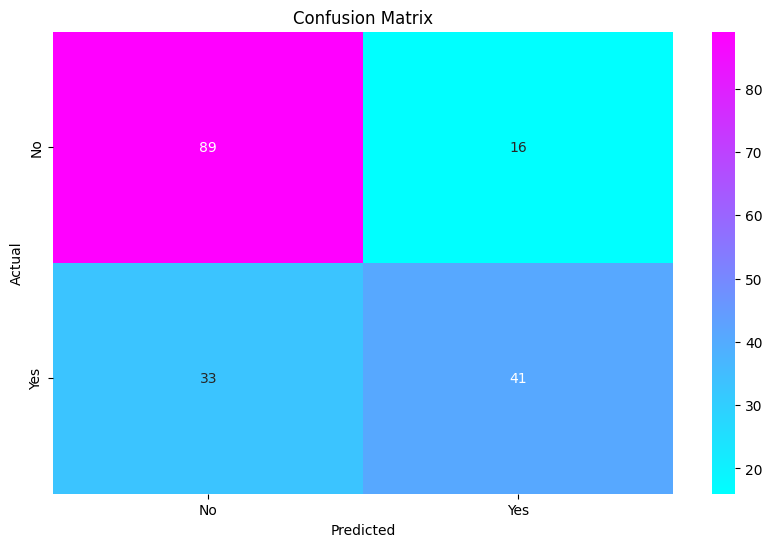

In [28]:
cm=confusion_matrix(y_test,catboost_predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="cool", xticklabels=label_name, yticklabels=label_name)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
print("Classification Report:")

print(classification_report(y_test, catboost_predictions,target_names=label_name))

Classification Report:
              precision    recall  f1-score   support

          No       0.73      0.85      0.78       105
         Yes       0.72      0.55      0.63        74

    accuracy                           0.73       179
   macro avg       0.72      0.70      0.71       179
weighted avg       0.73      0.73      0.72       179



# Prediction on test data

In [30]:
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")

In [31]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
PassengerId=test_df.PassengerId

In [33]:
test_df.drop(columns=["Name","Sex","Age","Ticket","Cabin","PassengerId"],axis=1,inplace=True)

In [34]:
test_df.shape


(418, 5)

In [35]:
test_df.isnull().sum()

Pclass      0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [36]:
test_df['Fare'].fillna(test_df["Fare"].mean(), inplace=True)



<ipython-input-36-913fe7907eb2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df["Fare"].mean(), inplace=True)


In [37]:
col=["Embarked"]
for i in col:
    test_df[i]=le.fit_transform(test_df[i])

In [38]:
test_df.head()

,Pclass,SibSp,Parch,Fare,Embarked
0,3,0,0,7.8292,1
1,3,1,0,7.0000,2
2,2,0,0,9.6875,1
3,3,0,0,8.6625,2
4,3,1,1,12.2875,2


In [39]:
my_prediction=catboost_classifier.predict(test_df)

my_submission=pd.DataFrame({'PassengerId':PassengerId,'Survived':my_prediction})
my_submission.to_csv('submission.csv',index=False)

In [40]:
my_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
